# Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

Step 1: Importing the Relevant Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Step 2: Data Inspection

In [4]:
train = pd.read_csv("agent_followup_data - Dataset.csv")
train.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [5]:
train.shape

(68354, 7)

* __We have 68354 rows and 7 columns in Train set whereas Test set has 5681 rows and 11 columns.__

Step 3: Data Cleaning

In [6]:
#ratio of null values
train.isnull().sum()

id                 0
followup_date      0
lead_created_at    0
leadId             0
followup_type      0
agentId            0
additional_data    0
dtype: int64

In [7]:
train.columns

Index(['id', 'followup_date', 'lead_created_at', 'leadId', 'followup_type',
       'agentId', 'additional_data'],
      dtype='object')

In [8]:
train.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


Step 4: Exploratory Data Analysis

In [9]:
train['followup_type'].value_counts()

emails          44757
textmessages    20292
calls            3305
Name: followup_type, dtype: int64

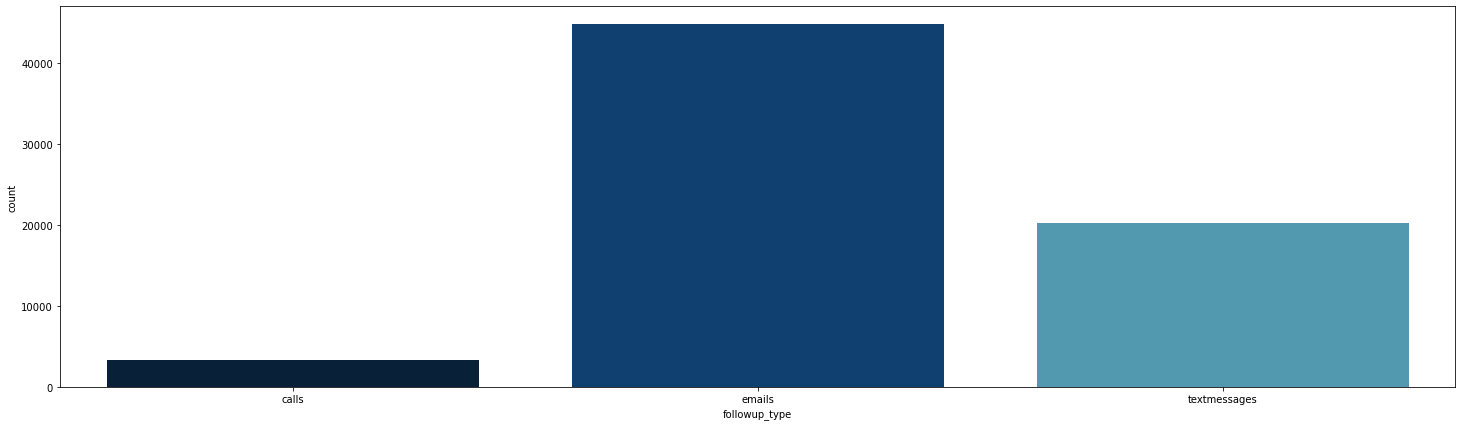

In [10]:
plt.figure(figsize=(25,7))
sns.countplot('followup_type',data=train,palette='ocean')
plt.show()

In [11]:
No_of_follow_up = train.groupby("followup_type")["agentId"].value_counts()
No_of_follow_up

followup_type  agentId
calls          4           1087
               9            814
               10           647
               8            293
               6            210
               7            183
               2             65
               5              6
emails         5          11065
               9           7292
               4           7140
               10          5630
               7           5207
               2           3706
               6           2256
               8           1945
               3            516
textmessages   4           7063
               10          5378
               6           3140
               7           2429
               9           1175
               8            494
               2            315
               5            170
               0            115
               3             13
Name: agentId, dtype: int64

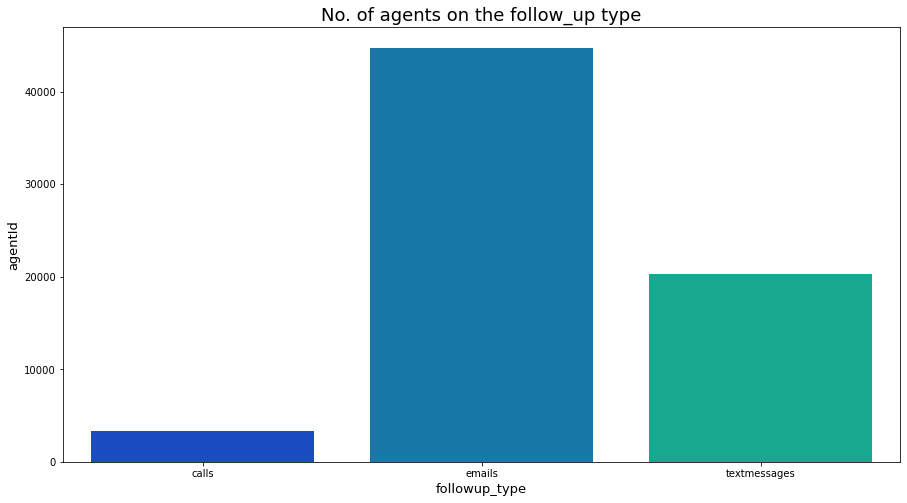

In [12]:
plt.figure(figsize = (15,8))
sns.countplot('followup_type',data=train,palette="winter")
plt.title("No. of agents on the follow_up type",fontsize=18)
plt.xlabel("followup_type",fontsize=13)
plt.ylabel('agentId',fontsize=13)
plt.show()

In [13]:
train['additional_data'].value_counts()

{'is_incoming': False}                     48425
{'is_incoming': True}                      16624
{'duration': 0, 'is_incoming': False}       1230
{'duration': 0, 'is_incoming': True}         202
{'duration': 38, 'is_incoming': False}        33
                                           ...  
{'duration': 669, 'is_incoming': False}        1
{'duration': 790, 'is_incoming': False}        1
{'duration': 56, 'is_incoming': True}          1
{'duration': 203, 'is_incoming': False}        1
{'duration': 213, 'is_incoming': True}         1
Name: additional_data, Length: 492, dtype: int64

In [14]:
train['additional_data'].replace(['is_incoming','duration'],['is_incoming','duration'],inplace = True)
train['additional_data'].replace(['is_incoming','duration'],['is_incoming','duration'],inplace = False)

0         {'duration': 0, 'is_incoming': False}
1         {'duration': 0, 'is_incoming': False}
2        {'duration': 91, 'is_incoming': False}
3         {'duration': 0, 'is_incoming': False}
4         {'duration': 0, 'is_incoming': False}
                          ...                  
68349                     {'is_incoming': True}
68350                    {'is_incoming': False}
68351                    {'is_incoming': False}
68352                    {'is_incoming': False}
68353                    {'is_incoming': False}
Name: additional_data, Length: 68354, dtype: object

In [15]:
train['additional_data']= train['additional_data'].astype(str)

In [16]:
Incoming_conversion = train.groupby("agentId")["additional_data"].value_counts()
Incoming_conversion

agentId  additional_data                       
0        {'is_incoming': True}                      115
2        {'is_incoming': False}                    3692
         {'is_incoming': True}                      329
         {'duration': 0, 'is_incoming': True}         4
         {'duration': 0, 'is_incoming': False}        3
                                                   ... 
10       {'duration': 95, 'is_incoming': False}       1
         {'duration': 97, 'is_incoming': False}       1
         {'duration': 97, 'is_incoming': True}        1
         {'duration': 98, 'is_incoming': True}        1
         {'duration': 99, 'is_incoming': True}        1
Name: additional_data, Length: 925, dtype: int64

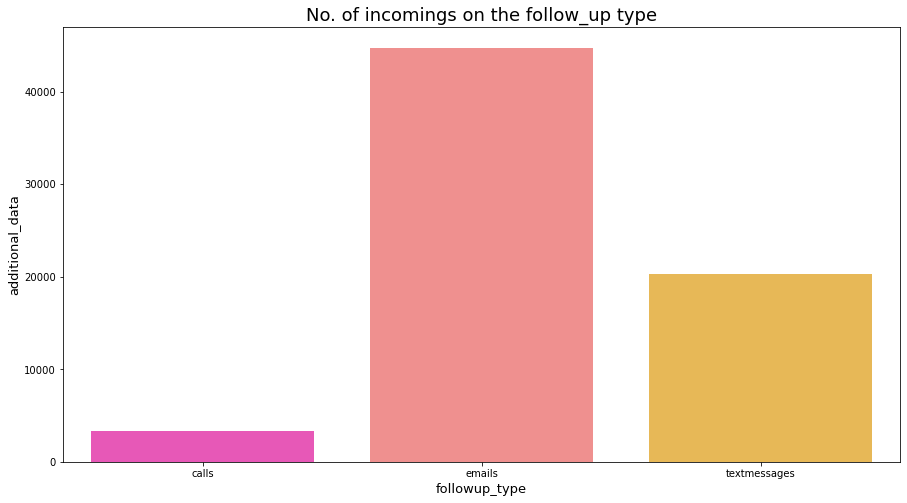

In [17]:
plt.figure(figsize = (15,8))
sns.countplot('followup_type',data=train,palette="spring")
plt.title("No. of incomings on the follow_up type",fontsize=18)
plt.xlabel("followup_type",fontsize=13)
plt.ylabel('additional_data',fontsize=13)
plt.show()

In [18]:
train['agentId'].value_counts()

4     15290
10    11655
5     11241
9      9281
7      7819
6      5606
2      4086
8      2732
3       529
0       115
Name: agentId, dtype: int64

In [19]:
train['agentId']=np.where(train['id']>1,'emails','textmessages')

ValueError: could not convert string to float: '2020-03-05 14:38:54'

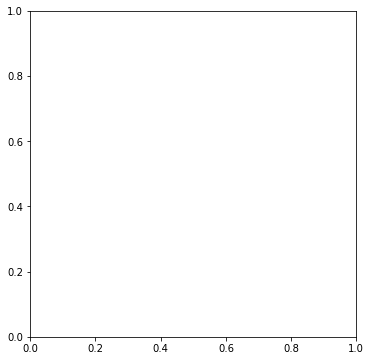

In [20]:
Data= train.agentId.value_counts()
labels=np.array(train.index)
sizes = train.values
colors = ['#00DDAA', '#9977FF']
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Result',fontsize=18)
plt.axis('equal',fontsize=8)
plt.show()
float()

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot('additional_data',data=train,palette='ocean')
plt.show()